In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
nashville_parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')

In [4]:
print(nashville_parks)

              acres                  name year_estab   
0             69.86    Harpeth River Park       1988  \
1              9.88    Harpeth Knoll Park       1972   
2             17.14         Bellevue Park       1982   
3            809.59       Bells Bend Park       2007   
4          2168.792  Alvin G. Beaman Park       1996   
..              ...                   ...        ...   
282    3.7454340524                   NaN       2003   
283   1.46849965739                   NaN       2000   
284  0.181880190971                   NaN       2003   
285   7.30424931138                   NaN       2014   
286   6.50392802351                   NaN       2002   

                                    common_nam status   
0                                Harpeth River   PARK  \
1                                Harpeth Knoll   PARK   
2                                  Red Caboose   PARK   
3                                   Bells Bend   PARK   
4                                       Be

In [5]:
nashville_parks['geometry'] = nashville_parks.apply(lambda x: Point((x.lon, 
                                                         x.lat)), 
                                        axis=1)
nashville_parks.head(5)

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,POINT (-86.95922 36.07738)
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...",POINT (-86.93816 36.05943)
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...",POINT (-86.93354 36.07160)
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...",POINT (-86.92646 36.15017)
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,POINT (-86.91984 36.26076)


In [6]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
park_geo = gpd.GeoDataFrame(nashville_parks, 
                           crs = zipcodes.crs, 
                           geometry = nashville_parks['geometry'])

In [8]:
print(type(park_geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [9]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [10]:
parks_by_zip = gpd.sjoin(park_geo, zipcodes, op = 'within')

C:\Users\scost\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [11]:
print(parks_by_zip.head(10))

      acres                         name year_estab        common_nam status   
0     69.86           Harpeth River Park       1988     Harpeth River   PARK  \
1      9.88           Harpeth Knoll Park       1972     Harpeth Knoll   PARK   
2     17.14                Bellevue Park       1982       Red Caboose   PARK   
5   1113.12            Edwin Warner Park       1937      Edwin Warner   PARK   
7   1991.56            Percy Warner Park       1926      Percy Warner   PARK   
3    809.59              Bells Bend Park       2007        Bells Bend   PARK   
11    12.26         Bordeaux Garden Park       1964   Bordeaux Garden   PARK   
16     54.2      Richard W. Hartman Park       1964           Hartman   PARK   
22    34.85    Joseph Brown Mullins Park       2012           Mullins   PARK   
25    16.81  Bordeaux-Timothy Drive Park       1980  Bordeaux-Timothy   PARK   

                       address           lon          lat   
0          7820 Coley Davis Rd   -86.9592214  36.07738249 

In [18]:
new_parks_by_zip = parks_by_zip.drop(['lon', 'lat', 'descriptio'], axis=1)

In [20]:
print(new_parks_by_zip.head(25))

        acres                              name year_estab        common_nam   
0       69.86                Harpeth River Park       1988     Harpeth River  \
1        9.88                Harpeth Knoll Park       1972     Harpeth Knoll   
2       17.14                     Bellevue Park       1982       Red Caboose   
5     1113.12                 Edwin Warner Park       1937      Edwin Warner   
7     1991.56                 Percy Warner Park       1926      Percy Warner   
3      809.59                   Bells Bend Park       2007        Bells Bend   
11      12.26              Bordeaux Garden Park       1964   Bordeaux Garden   
16       54.2           Richard W. Hartman Park       1964           Hartman   
22      34.85         Joseph Brown Mullins Park       2012           Mullins   
25      16.81       Bordeaux-Timothy Drive Park       1980  Bordeaux-Timothy   
109     19.78                     City Cemetery       1963     City Cemetery   
121         5                   County C

In [23]:
parks_in_nash = new_parks_by_zip.loc[(new_parks_by_zip['zip'] == '37221') | (new_parks_by_zip['zip'] == '37209')]
parks_in_nash.shape

(14, 10)

In [26]:
polygon_nash = zipcodes.loc[(zipcodes['zip'] == '37221') | (zipcodes['zip'] == '37209')]
polygon_nash.shape

(2, 3)

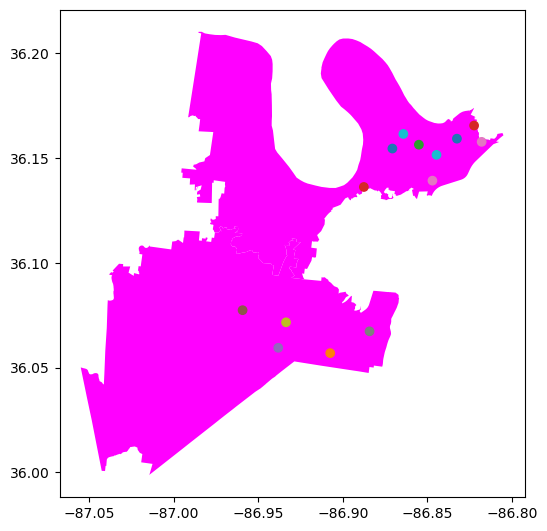

In [28]:
ax = polygon_nash.plot(figsize = (6, 8), color = 'magenta')
parks_in_nash.plot( ax = ax, column = 'common_nam');
plt.show();

In [29]:
polygon_nash.geometry.centroid

C:\Users\scost\AppData\Local\Temp\ipykernel_20592\2882727082.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_nash.geometry.centroid


7     POINT (-86.97531 36.06283)
12    POINT (-86.91816 36.15605)
dtype: geometry

In [31]:
center = polygon_nash.geometry.centroid[12]
print(center)

POINT (-86.91816342256455 36.15604558838379)


C:\Users\scost\AppData\Local\Temp\ipykernel_20592\1900295457.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_nash.geometry.centroid[12]


In [32]:
area_center = [center.y, center.x]
print(area_center)

[36.15604558838379, -86.91816342256455]
